In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/ewenme/transfers/master/data/liga-nos.csv'
df=pd.read_csv(url)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21734 entries, 0 to 21733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           21734 non-null  object 
 1   player_name         21734 non-null  object 
 2   age                 21723 non-null  float64
 3   position            21734 non-null  object 
 4   club_involved_name  21734 non-null  object 
 5   fee                 21728 non-null  object 
 6   transfer_movement   21734 non-null  object 
 7   transfer_period     21734 non-null  object 
 8   fee_cleaned         6606 non-null   float64
 9   league_name         21734 non-null  object 
 10  year                21734 non-null  int64  
 11  season              21734 non-null  object 
 12  country             21734 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


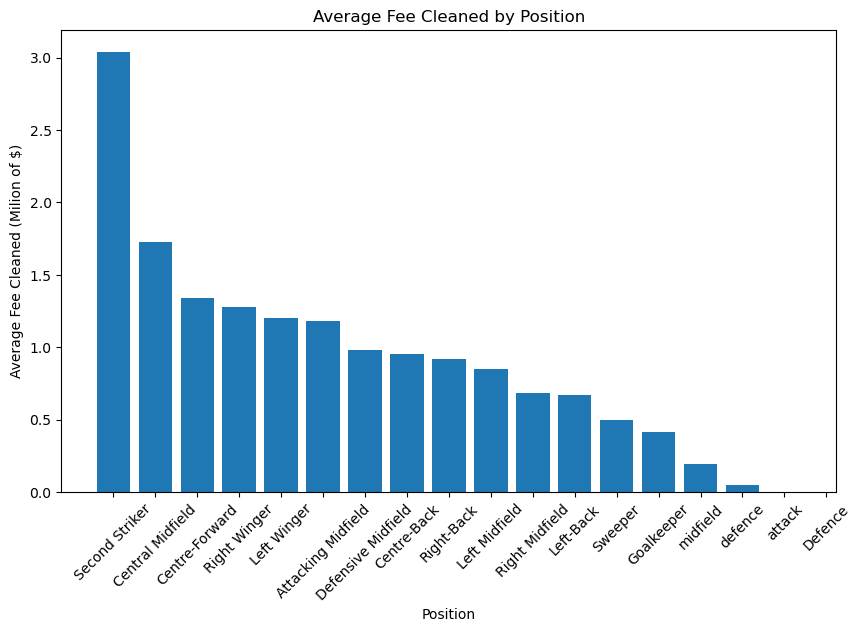

In [21]:
df_grouped = df.groupby(['position'])['fee_cleaned'].mean().reset_index()
df_grouped = df_grouped.sort_values(by=['fee_cleaned'], ascending=False)

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df_grouped['position'], df_grouped['fee_cleaned'])
plt.xticks(rotation=45)
plt.xlabel('Position')
plt.ylabel('Average Fee Cleaned (Milion of $)')
plt.title('Average Fee Cleaned by Position')
plt.show()


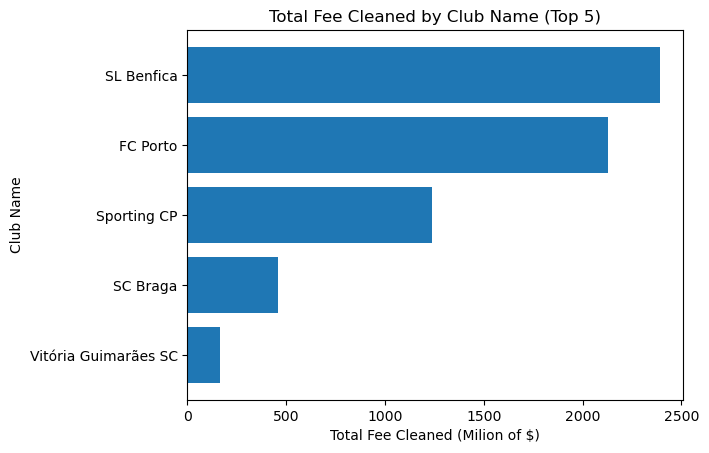

In [31]:
# Calculate the total fee cleaned by club name
df_grouped = df.groupby(['club_name'])['fee_cleaned'].sum().reset_index()

# Sort the grouped data in ascending order
df_sorted = df_grouped.sort_values(by=['fee_cleaned'], ascending=True)

# Select the top 5 clubs
df_top5 = df_sorted.tail(5)

# Create a horizontal bar graph of the total fee cleaned by club name for the top 5 clubs
plt.barh(df_top5['club_name'], df_top5['fee_cleaned'])

# Set the plot title and axis labels
plt.title('Total Fee Cleaned by Club Name (Top 5)')
plt.xlabel('Total Fee Cleaned (Milion of $)')
plt.ylabel('Club Name')

# Display the plot
plt.show()


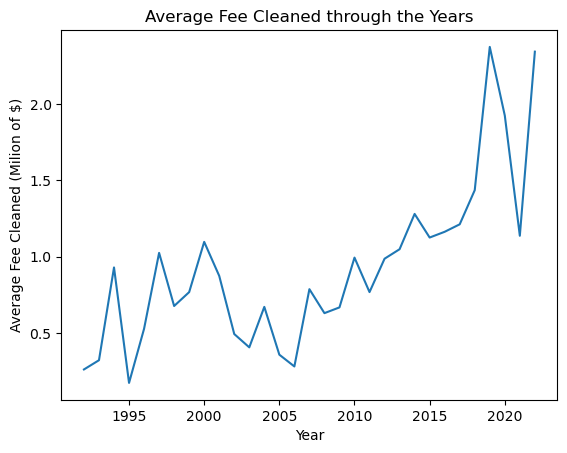

In [20]:
import matplotlib.pyplot as plt

# Filter the data to exclude year 2023
df_filtered = df[df['year'] != 2023]

# Group the filtered data by year and calculate the mean of fee_cleaned for each year
df_grouped = df_filtered.groupby(['year'])['fee_cleaned'].mean().reset_index()

# Create a line graph of the average fee_cleaned through the years
plt.plot(df_grouped['year'], df_grouped['fee_cleaned'])

# Set the plot title and axis labels
plt.title('Average Fee Cleaned through the Years')
plt.xlabel('Year')
plt.ylabel('Average Fee Cleaned (Milion of $)')

# Display the plot
plt.show()


In [3]:
#filtering only Benfica players
df = df[df['club_name'] == "SL Benfica"]

In [4]:
#filtering only sales from 2010
df=df[df['year'] >=2010]

In [5]:
#filtering only sold players
df=df[df['transfer_movement']=='out']

In [6]:
#only fee values corresponding to transfer amounts
df = df[df['fee'].str.contains('^€\d+\.?\d*[m|Th]$', regex=True)]

In [7]:
#removing unnecessary columns and correcting the value of fee_cleaned
df = df.drop(['season','transfer_movement','fee','league_name','country','club_name'],axis = 1)
df['fee_cleaned'] = df['fee_cleaned'] * 1000000

In [8]:
df.reset_index(drop=True)

,player_name,age,position,club_involved_name,transfer_period,fee_cleaned,year
0,Ángel Di María,22.0,Right Winger,Real Madrid,Summer,33000000.0,2010
1,Ramires,23.0,Central Midfield,Chelsea,Summer,22000000.0,2010
2,Rafik Halliche,23.0,Centre-Back,Fulham,Summer,2500000.0,2010
3,Ariza Makukula,29.0,Centre-Forward,Manisaspor,Summer,1700000.0,2010
4,David Luiz,23.0,Centre-Back,Chelsea,Winter,25000000.0,2010
...,...,...,...,...,...,...,...
86,Nuno Santos,23.0,Attacking Midfield,Charlotte,Summer,1000000.0,2022
87,Enzo Fernández,22.0,Central Midfield,Chelsea,Winter,121000000.0,2022
88,Diogo Gonçalves,25.0,Right Winger,FC Copenhagen,Winter,2000000.0,2022
89,Tomás Tavares,21.0,Right-Back,Spartak Moscow,Winter,2000000.0,2022


In [9]:
df.to_csv('Transfers/Transfers_cleaned.csv', index=False)